# 2.c.   Both JSON and Parquet datasets are identical in contents, but you must choose to use one over the other. Please provide your justification for your choice of dataset...?

#### 1.Parquet is faster then json, json is normally used for configurations setting,but Parquet is columnar dataset formot which is more faster when ever reading.
#### 2 In google cloud, database called big query is a columnar database which works more faster with Parquet data


# importing required library

In [170]:
import pandas as pd
import numpy as np
import json
import requests
import geocoder
from matplotlib import pyplot as plt
import seaborn as sns
import glob, os, json
from geopy.geocoders import Nominatim
import goslate
geolocator = Nominatim(user_agent="geoapiExercises")
import ast
from pandas.io.json import json_normalize
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm._tqdm_notebook import tqdm_notebook
from tqdm.auto import tqdm
tqdm.pandas()
import pinyin
import scipy.stats as stats
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing

# Reading all the json file inside the dowload folder

In [171]:
def read_json(json_dir):
    json_pattern = os.path.join(json_dir, '*.json')
    file_list = glob.glob(json_pattern)

    dfs = []
    for file in file_list[:2]:
        print(file)
        json_data = pd.read_json(file,lines=True)
        dfs.append(json_data)
    df = pd.concat(dfs)
    
    return df
    

In [172]:
#df=read_json('json')

## reading the all the csv file having all the json data.

In [173]:
#df=pd.read_csv("Ocean AIS dwell behavior.csv")

## preprocesseing data

In [174]:
def preprocess(df):
    try:
        df["epochMillis"] = pd.to_datetime(df["epochMillis"],unit='ms')
    
        df["epochMillis"] = pd.to_datetime(df["epochMillis"],unit='ms')
        v = json_normalize([ast.literal_eval(j) for j in df.pop("position")], sep='')
        df=pd.concat([df, v], 1)
        
        
        
        v = json_normalize([ast.literal_eval(j) for j in df.pop("navigation")], sep='')
        df=pd.concat([df, v], 1)
        
        
        
        v = json_normalize([ast.literal_eval(j) for j in df.pop("vesselDetails")], sep='')
        v=v.rename(columns={"name":"vessel_name"})
        df=pd.concat([df, v], 1)
        
        
        v = json_normalize([ast.literal_eval(j) for j in df.pop("port")], sep='')
        v=v.rename(columns={"name":"port_name",'latitude':"port_latitude","longitude":"port_longitude"})
        df=pd.concat([df, v], 1)
    except exception as e:
        print(e)
        
    return df

In [175]:
#df = preprocess(df)

# read preprocessed data

In [176]:
df=pd.read_csv("preprocessed_data.csv")
df["epochMillis"] = pd.to_datetime(df["epochMillis"])

# 3.What is(are) the main time period(s) in the data?


#### from the below plots, we can say that , main time period will be 3rd month(march) and the week 13 from compared week 12 and year 2019 is having more vessel involved the transportaion

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='day', ylabel='values_count'>

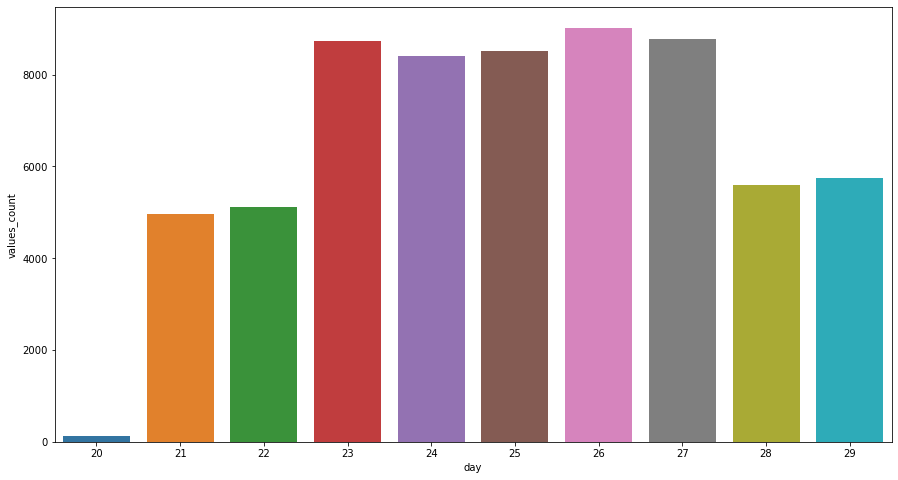

In [177]:
df["day"] = df["epochMillis"].dt.day
dd = df.groupby(["day"])["mmsi"].nunique().sort_values(ascending=False).reset_index().rename(columns={"mmsi":"values_count"})


plt.figure(figsize = [15,8])
sns.barplot("day","values_count",data = dd)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='week', ylabel='values_count'>

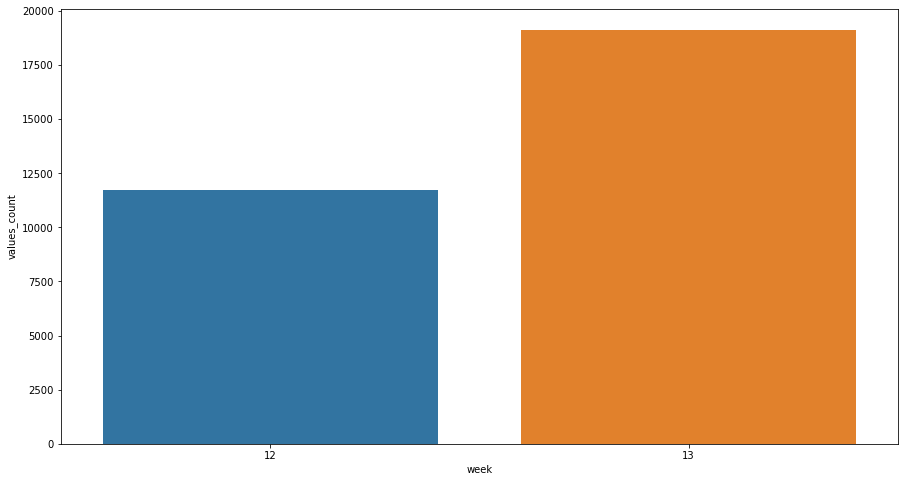

In [178]:
df["week"] = df["epochMillis"].dt.week
dd = df.groupby(["week"])["mmsi"].nunique().sort_values(ascending = False).reset_index().rename(columns = {"mmsi":"values_count"})


plt.figure(figsize =[15,8])
sns.barplot("week","values_count",data = dd)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='values_count'>

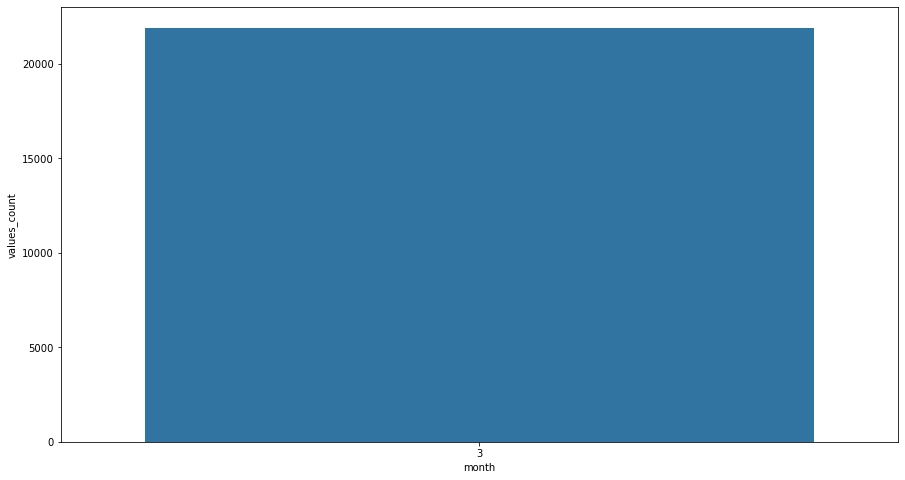

In [179]:
df["month"] = df["epochMillis"].dt.month
dd = df.groupby(["month"])["mmsi"].nunique().sort_values(ascending=False).reset_index().rename(columns={"mmsi":"values_count"})


plt.figure(figsize =[15,8])
sns.barplot("month","values_count",data  =dd)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='values_count'>

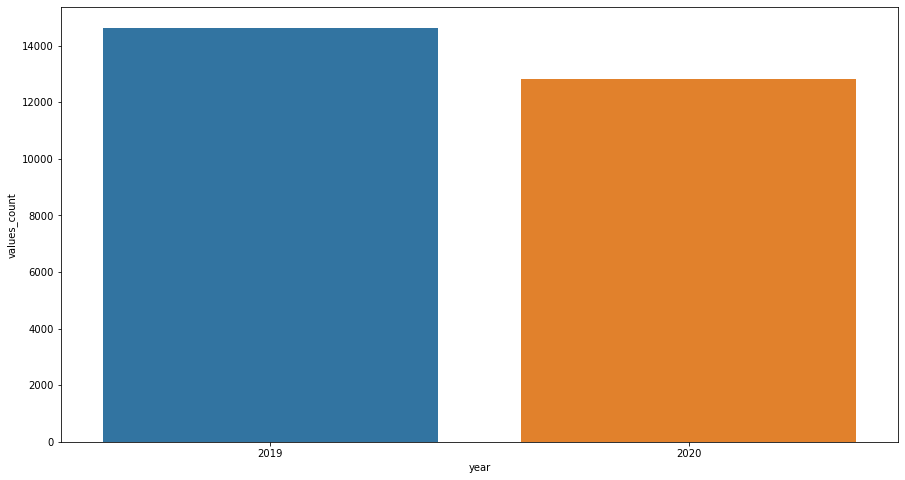

In [180]:
df["year"]= df["epochMillis"].dt.year

dd = df.groupby(["year"])["mmsi"].nunique().sort_values(ascending = False).reset_index().rename(columns =  {"mmsi":"values_count"})


plt.figure(figsize = [15,8])
sns.barplot("year","values_count",data = dd)

# 4.Which are the top three most sparse variables?
#### 1.what does sparesity means:
#### ans: we can tell the data spare in 2 ways , onw way is while checking raw data where we see the fature having lot Nan values and the other ways is while giving the data to the model model where the varibales  were having variations in the data.


## top 3 spare varibales were 

####  cargoDetails : 0.9040633850881882
####  imo : 0.4234289239371457
####  destination : 0.3272951229994614
####  callSign : 0.29131860454472047



In [181]:
f=[]
d=[]
def nullplot():
    for feature in df.columns:
        print(feature,":",df[feature].isna().sum()/df.shape[0])
        #sns.barplot(x=df[feature],y=df2[feature].isna().sum()/df2.shape[0])
        f.append(feature)
        d.append(df[feature].isna().sum()/df.shape[0])
    plt.figure(figsize=[15,5])
    sns.barplot(x=f,y=d)
    return

Unnamed: 0 : 0.0
Unnamed: 0.1 : 0.0
epochMillis : 0.0
mmsi : 0.0
olson_timezone : 0.0
imo : 0.4159598362973853
callSign : 0.2914158967299211
destination : 0.32935451526122533
cargoDetails : 0.904400851702353
latitude : 0.0
longitude : 0.0
navCode : 0.0
navDesc : 0.0
courseOverGround : 0.0
heading : 0.0
rateOfTurn : 0.0
speedOverGround : 0.0
vessel_name : 0.0
typeName : 0.0
typeCode : 0.0
draught : 0.06281187989220496
length : 0.0121701815360092
width : 0.0121701815360092
flagCode : 0.0
flagCountry : 0.0
unlocode : 2.3372731968521603e-06
port_name : 2.3372731968521603e-06
port_latitude : 2.3372731968521603e-06
port_longitude : 2.3372731968521603e-06
day : 0.0
week : 0.0
month : 0.0
year : 0.0


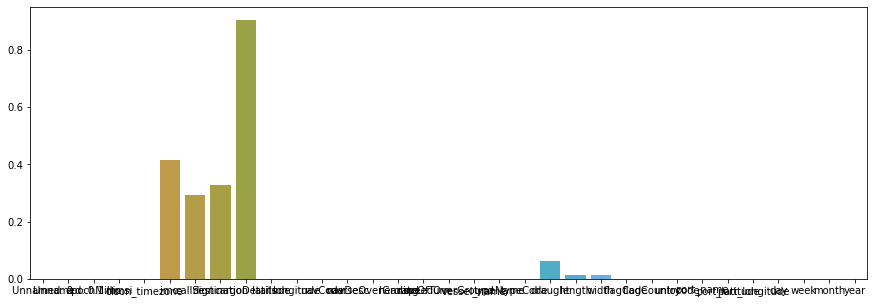

In [182]:
nullplot()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fetures', ylabel='counts'>

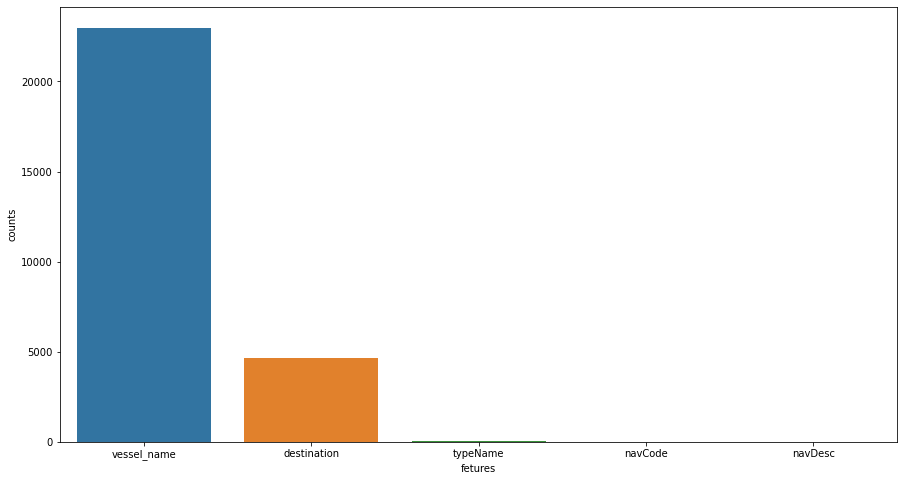

In [183]:
cat =["navCode","navDesc","port_name","typeName","unlocode","vessel_name","destination","olson_timezone"]

dd = df[cat].nunique().sort_values(ascending = False).reset_index()[:5].rename(columns = {'index':"fetures",0:"counts"})
plt.figure(figsize = [15,8])
sns.barplot("fetures","counts",data = dd)
    

In [184]:
dd

,fetures,counts
0,vessel_name,22983
1,destination,4629
2,typeName,25
3,navCode,15
4,navDesc,13


## 5.What region(s) of the world and ocean port(s) does this data represent? Provide evidence to justify your answer.

#### below table gives city of the position od the vessel having the flagcountry as inda


In [ ]:
df_india=df[df["flagCountry"]=='India'].reset_index()
df_india['city']=np.nan
for i in range (0,len(df_india['latitude'])):
    try:
        location=geolocator.reverse(str(df_india['latitude'][i])+","+str(df_india['longitude'][i]))
        df_india['city'].iloc[i]=pinyin.get(location.raw.get('address').get('city'))
    except:
        pass
df_india

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# 6.frequency tabulation of the various Navigation Codes & Descriptions (i.e., navCode & NavDesc).

In [ ]:
dd = df["navCode"].value_counts().sort_values(ascending = False).reset_index().rename(columns = {"index":"navCode","navCode":"values_count"})
dd

In [ ]:
dd = df["navDesc"].value_counts().sort_values(ascending = False).reset_index().rename(columns = {"index":"navDesc","navDesc":"values_count"})
dd

In [ ]:
dd = df.groupby(["port_name"])["mmsi"].nunique().sort_values(ascending = False).reset_index()
dd

In [ ]:
dd = df.groupby(["mmsi"])["navCode"].nunique().sort_values(ascending = False).reset_index()
dd

# 7. For MMSI = 205792000

In [ ]:
df_205792000 = df[df["mmsi"] == 205792000]  # filter the data belongs to MMSI 205792000

## 7 a.   Limit the data to only the TOP 5 Navigation Codes based from the response to question 6


In [ ]:
dd=df_205792000["navCode"].value_counts().sort_values(ascending=False).reset_index()[:5].rename(columns = {'index':"navCode","navCode":"counts"})
plt.figure(figsize=[15,8])
sns.barplot("navCode","counts",data=dd)

In [ ]:
dd=df_205792000["navDesc"].value_counts().sort_values(ascending=False).reset_index()[:5].rename(columns = {'index':"navDesc","navDesc":"counts"})
plt.figure(figsize=[15,8])
sns.barplot("navDesc","counts",data=dd)

### 7.b.   Provide the final state for each series of contiguous events with the same Navigation Code; series may be interrupted by other series, but each contiguous series must be its own record.

In [ ]:
df_205792000['city']=np.nan
for i in range (0,len(df_205792000['latitude'])):
    try:
        location=geolocator.reverse(str(df['latitude'][i])+","+str(df['longitude'][i]))
        df_205792000['city'].iloc[i]=pinyin.get(location.raw.get('address').get('city'))
    except:
        pass

In [ ]:
df_205792000.groupby(["mmsi","navCode"])["epochMillis"].max().reset_index().merge(df_205792000[["epochMillis","mmsi","navCode","navDesc","latitude","longitude","city"]],on=["mmsi","navCode",'epochMillis'],how="inner")



### 7.c.   Final report should include at least the following fields/columns:
### i.   mmsi = the MMSI of the vessel
### ii.   timestamp = the timestamp of the last event in that contiguous series
### iii.   Navigation Code = the navigation code (i.e., navigation.navCode)
### iv.   Navigation Description = the navigation code description (i.e., navigation.navDesc)
### v.   lead time (in Milliseconds) = the time difference in milliseconds between the last and first timestamp of that particular series of the same contiguous navigation codes


In [ ]:
dff=df_205792000.groupby(["mmsi","navCode","navDesc"])["epochMillis"].max().reset_index().rename(columns={"epochMillis":"last_event"})
dff["lead_time_in_ms"]=np.nan

In [ ]:
dff["lead_time_in_ms"]=df_205792000.groupby(["mmsi","navCode"])["epochMillis"].max().reset_index()[["epochMillis"]]-df_205792000.groupby(["mmsi","navCode"])["epochMillis"].min().reset_index()[["epochMillis"]]

In [ ]:
dff

# 8.For MMSI = 413970021

In [ ]:
df_413970021 = df[df["mmsi"] == 413970021]

## 8 a.   Limit the data to only the TOP 5 Navigation Codes based from the response to question 6



In [ ]:
dd=df_413970021["navCode"].value_counts().sort_values(ascending=False).reset_index()[:5].rename(columns = {'index':"navCode","navCode":"counts"})
plt.figure(figsize=[15,8])
sns.barplot("navCode","counts",data=dd)

In [ ]:
dd=df_413970021["navDesc"].value_counts().sort_values(ascending=False).reset_index()[:5].rename(columns = {'index':"navDesc","navDesc":"counts"})
plt.figure(figsize=[15,8])
sns.barplot("navDesc","counts",data=dd)

### 8.b.   Provide the final state for each series of contiguous events with the same Navigation Code; series may be interrupted by other series, but each contiguous series must be its own record.

In [ ]:
df_413970021['city']=np.nan
for i in range (0,len(df_413970021['latitude'])):
    try:
        location=geolocator.reverse(str(df['latitude'][i])+","+str(df_413970021['longitude'][i]))
        ddf_413970021['city'].iloc[i]=pinyin.get(location.raw.get('address').get('city'))
    except:
        pass

In [ ]:
df_413970021.groupby(["mmsi","navCode"])["epochMillis"].max().reset_index().merge(df_413970021[["epochMillis","mmsi","navCode","navDesc","latitude","longitude","city"]],on=["mmsi","navCode",'epochMillis'],how="inner")





### 8.c.   Final report should include at least the following fields/columns:
### i.   mmsi = the MMSI of the vessel
### ii.   timestamp = the timestamp of the last event in that contiguous series
### iii.   Navigation Code = the navigation code (i.e., navigation.navCode)
### iv.   Navigation Description = the navigation code description (i.e., navigation.navDesc)
### v.   lead time (in Milliseconds) = the time difference in milliseconds between the last and first timestamp of that particular series of the same contiguous navigation codes



In [ ]:
dff=df_413970021.groupby(["mmsi","navCode","navDesc"])["epochMillis"].max().reset_index().rename(columns={"epochMillis":"last_event"})
dff["lead_time_in_ms"]=np.nan

In [ ]:
dff["lead_time_in_ms"]=df_413970021.groupby(["mmsi","navCode"])["epochMillis"].max().reset_index()[["epochMillis"]]-df_413970021.groupby(["mmsi","navCode"])["epochMillis"].min().reset_index()[["epochMillis"]]




In [ ]:
dff

## 8 a.   Do you agree with the Navigation Code(s) and Description(s) for this particular vessel?   
#### ii.   If you do not agree, provide an explanation why do disagree. Additionally, if you do not agree, what would you change it to and why?
#### answer  :  i dont agree becuase vessel should have the nav code and nav desc in order to keep the track of status of the vessel, weather it was Under Way Using Engine,At Anchor or Moored


# ML modelling still in progess ,i will let you know, i fully got the understanding of business and data

# applying label encoding 

In [ ]:
def data_prepariation_model(df):
    try:
        model= df.groupby(['mmsi','navDesc',"typeName",'unlocode','vessel_name','destination']).agg({"courseOverGround":"mean","rateOfTurn":"mean","speedOverGround":"mean","draught":"mean","length":"mean","width":'mean'}).reset_index()

        df_m=df.groupby(['mmsi','navDesc',"typeName",'unlocode','vessel_name','destination'])["epochMillis"].max().reset_index()

        df_m["dwell_time"]=df.groupby(["mmsi","navDesc"])["epochMillis"].max().reset_index()["epochMillis"]-df.groupby(["mmsi","navDesc"])["epochMillis"].min().reset_index()["epochMillis"]
    
        df_model=model.merge(df_m,on=['mmsi','navDesc',"typeName",'unlocode','vessel_name','destination'],how="left")
        df_model["dwell_time"]=df_m["dwell_time"].dt.total_seconds()
    
        df_model=df_model[(df_model["navDesc"]=='At Anchor') ^ (df_model["navDesc"]=='Moored')]
        df_model=df_model.drop(["mmsi","epochMillis"],axis=1)
    
        return df_model 
    except exception as e
        print(e)
    




In [ ]:
df_model=data_prepariation_model(df)

In [ ]:
def label_encoder(categorical_list,df):
    try:
        for i in categorical_list:
            label_encoder = preprocessing.LabelEncoder()
            df[i]= label_encoder.fit_transform(df[i])
        return df
    except exception as e
        print(e)

In [ ]:
df_model

In [ ]:
cat =['navDesc',"typeName",'unlocode','vessel_name','destination']
df = label_encoder(cat,df_model)

In [ ]:
df

In [ ]:
def distribution_plot(df):
    try:
        temp=[]
        for i in df.columns :
            if df[i].dtypes == "int64" or df[i].dtypes == "float64" :
                temp.append(i)
    
        for feature in  temp:
            plt.figure(figsize=(10,5))
            plt.subplot(1,2,1)
            sns.kdeplot(df[feature])
            plt.subplot(1,2,2)
            stats.probplot(df[feature],plot=pylab)
            plt.show()
        return
    except exception as e
        print(e)

In [ ]:
distribution_plot(df)

In [ ]:
def train_test_split_and_Incoterms_encoding(df):
    try:
        x=df.drop("dwell_time",axis=1)
        y=df["dwell_time"]
    
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 20)
        return xtrain, xtest, ytrain, ytest
    except exception as e
        print(e)


In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split_and_Incoterms_encoding(df)

In [ ]:
xtrain

In [ ]:
xtest

In [ ]:
import xgboost
best_xgb_model = xgboost.XGBRegressor()
best_xgb_model.fit(xtrain,ytrain)
y_pred =best_xgb_model.predict(xtest)
r2_score(ytest,y_pred)